# Table of Contents

Step 1 = Import Libraries and Data Sets

Step 2 = Clean Up Data Set

Step 3 = Addressing Security Implications

Step 4 = Customer Behavior Basede on Goegraphic Location

Step 5 = Create an Exclusion Flag for Low-activity Customers

Step 6 = Customer Profiling for More Relevant Marketing: Age

Step 7 = Customer Profiling for More Relevant Marketing: Income

Step 8 = Customer Profiling for More Relevant Marketing: Goods (Alcohol)

Step 9 = Customer Profiling for More Relevant Marketing: Goods (Canned Goods)

Step 10 = Customer Profiling for More Relevant Marketing: Family Status

Step 11 = Customer Profiling for More Relevant Marketing: Loyalty

Step 12 = Customer Profiling for More Relevant Marketing: Region

Step 13 = Export Final Data Set


## Step 1 = Import Libraries and Data Sets

Import libraries 

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

Import datasets, creating a path shortcut

In [2]:
# Create path shortcut
path = r'C:\Users\kacee\OneDrive\Desktop\Instacart Basket Analysis'

In [3]:
# Import pkl complete data set
df_comp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_products_customers_merged.pkl'))

In [4]:
# Check df_complete output
df_comp.head(10)

,user_id,Gender,State,Age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,...,Regularly busy,Least busy days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,2984525,4,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,2505178,6,...,Regularly busy,Busiest days,Average orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,518967,1,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,both


In [5]:
# List of columns 
df_comp.columns

Index(['user_id', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', '_merge'],
      dtype='object')

In [4]:
# Import csv departments_wrangled dataset
df_dept = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [7]:
# Check df_dept output
df_dept.head(50)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## Step 2 = Clean Up Data Set

Prep df_dept for merge

In [5]:
# Rename 'unnamed: 0' column to 'department_id'
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [9]:
# Check results for df_dept

df_dept.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Change names of df_complete columns for consistency and prep for merge

In [6]:
# Change column name Gender
df_comp.rename(columns = {'Gender':'gender'}, inplace = True)

In [7]:
# Change column name State
df_comp.rename(columns = {'State':'state'}, inplace = True)

In [8]:
# Change column name Age
df_comp.rename(columns = {'Age':'age'}, inplace = True)

In [9]:
# Drop column _merge
df_comp = df_comp.drop(columns = ['_merge'])

In [14]:
# List of columns 
df_comp.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag'],
      dtype='object')

Merge df_complete and df_dept

In [10]:
# Merge dataframes
df_complete = df_comp.merge(df_dept, on = 'department_id')

In [16]:
# Check output
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,department
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Regularly busy,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,Regularly busy,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regularly busy,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,Regularly busy,Regularly busy,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,Regularly busy,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages


In [17]:
# Check shape
df_complete.shape

(32404859, 31)

In [18]:
# List of columns 
df_complete.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'department'],
      dtype='object')

In [19]:
# Check df_complete information
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   user_id                object 
 1   gender                 object 
 2   state                  object 
 3   age                    int64  
 4   date_joined            object 
 5   number_of_dependants   int64  
 6   fam_status             object 
 7   income                 int64  
 8   order_id               int64  
 9   order_number           int64  
 10  orders_day_of_week     int64  
 11  order_hour_of_day      int64  
 12  days_since_last_order  float64
 13  product_id             int64  
 14  add_to_cart_order      int64  
 15  reordered              int64  
 16  product_name           object 
 17  aisle_id               int64  
 18  department_id          int64  
 19  prices                 float64
 20  price_range_loc        object 
 21  busiest_day            object 
 22  busiest_days    

## Step 3 =  Addressing Security Implications

In order to keep sensitive or private information from being used, all names have been removed from this data set. After performing that task, information can no longer be traced back to an individual.

## Step 4 = Customer Behavior Basede on Goegraphic Location

In [11]:
# Create new column with regions based on State
result_1 = []

for value in df_complete['state']:
  if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
    result_1.append('Northeast')
  elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
    result_1.append('Midwest')
  elif value in ['Deleware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi']:
    result_1.append('South')
  else:
    result_1.append('West')

In [21]:
# Check result
result_1

['Midwest',
 'Midwest',
 'Midwest',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'West',
 'South',
 'South',
 'West',
 'West',
 'West',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',

In [12]:
# Add result_1 to df in new column
df_complete['state_region'] = result_1

In [23]:
# Check df_complete output
df_complete.head(50)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,department,state_region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Busiest days,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,Regularly busy,Average orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regularly busy,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,Regularly busy,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,Busiest days,Most orders,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West


In [24]:
# List of columns 
df_complete.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined',
       'number_of_dependants', 'fam_status', 'income', 'order_id',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'days_since_last_order', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_price',
       'spending_flag', 'median_days', 'frequency_flag', 'department',
       'state_region'],
      dtype='object')

In [25]:
# Create crosstab with State_Region and spending_flag
crosstab_1 = pd.crosstab(df_complete['state_region'], df_complete['spending_flag'], dropna = False)

In [26]:
# View crosstab to view regional spending habits of customers
crosstab_1

spending_flag,High spender,Low spender
state_region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,147660,7441442
West,222385,11273311


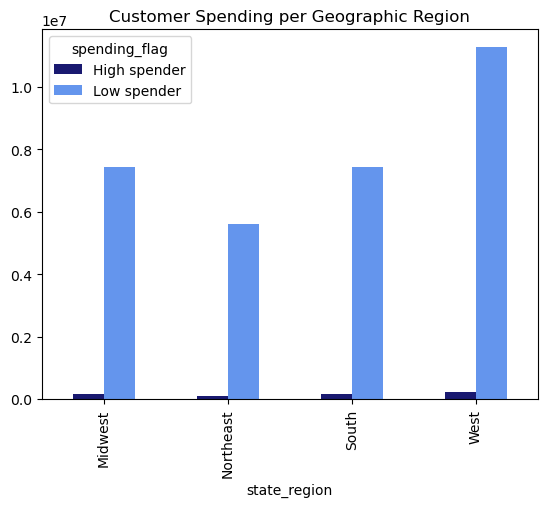

In [27]:
# Create Bar Chart of State_Region and spending_flag
bar_spending_1 = crosstab_1.plot.bar(title = 'Customer Spending per Geographic Region', color = ['midnightblue','cornflowerblue'])

In [28]:
# Export bar_spending_1 
bar_spending_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_complete_spending.png'))

## Step 5 = Create an Exclusion Flag for Low-activity Customers 

In [13]:
# Check shape of df_complete
df_complete.shape

(32404859, 32)

In [14]:
# create column for low-activity customers (<5)
df_complete.loc[df_complete['max_order']>=5,'customer_activity'] = 'High-activity Customer'
df_complete.loc[df_complete['max_order']<5,'customer_activity'] = 'Low-activity Customer'

In [31]:
# Check results for customer_activity
df_complete['customer_activity'].value_counts(dropna = False)

customer_activity
High-activity Customer    30964564
Low-activity Customer      1440295
Name: count, dtype: int64

In [15]:
# Create a subset for Low-activity customers
low_activity_cust = df_complete[df_complete['customer_activity'] == 'Low-activity Customer']

In [33]:
# Check shape of low_activity_cust
low_activity_cust.shape

(1440295, 33)

In [16]:
# Create a subset for High-activity customers
high_activity_cust = df_complete[df_complete['customer_activity'] == 'High-activity Customer']

In [35]:
# Check shape of High_activity_cust
high_activity_cust.shape

(30964564, 33)

In [36]:
# Export Low-activity customers subset
low_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','Low_activity_customers.pkl'))

In [37]:
# Export High-activity customers subset
high_activity_cust.to_pickle(os.path.join(path,'02 Data','Prepared Data','High_activity_customers.pkl'))

In [17]:
# Make high_activity_cust the complete data set moving forward
df_complete = high_activity_cust

## Step 6 = Customer Profiling for More Relevant Marketing: Age

In [39]:
# Check current shape of df_complete
df_complete.shape

(30964564, 33)

In [40]:
# Check current description of age
df_complete['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Create 3 age groups to analyze customers

In [18]:
# Group df_complete [age] into 3 different groups
df_complete.loc[df_complete['age']<35, 'age_group'] = 'Young Age'
df_complete.loc[(df_complete['age']>=35) & (df_complete['age']<55), 'age_group'] = 'Middle Age'
df_complete.loc[df_complete['age']>=55, 'age_group'] = 'Old Age'

In [42]:
# Check results of age_group
df_complete['age_group'].value_counts(dropna = False)

age_group
Old Age       12998031
Middle Age     9724238
Young Age      8242295
Name: count, dtype: int64

In [43]:
# Check results of age_group
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,department,state_region,customer_activity,age_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,8,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,9,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age


Look at frequency of age groups

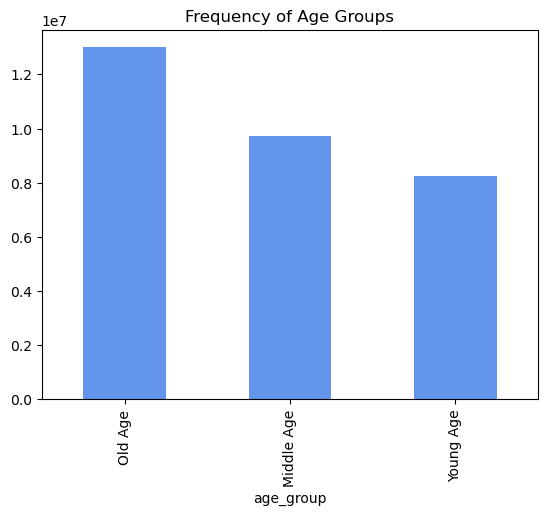

In [44]:
# Create Bar Chart for age_group
bar_agegroup_1 = df_complete['age_group'].value_counts().plot.bar(title = 'Frequency of Age Groups', color = ['cornflowerblue'])

In [45]:
# Export bar_agegroup_1
bar_agegroup_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_agegroups.png'))

Explore age groups by region

In [46]:
# Check age_group frequency by region
crosstab_age_region = pd.crosstab(df_complete['state_region'], df_complete['age_group'], dropna = False)

In [47]:
# Check Results of crosstab_age_region
crosstab_age_region

age_group,Middle Age,Old Age,Young Age
state_region,,,
Midwest,2317269,3032371,1911873
Northeast,1686498,2310112,1468075
South,2263296,3050974,1937680
West,3457175,4604574,2924667


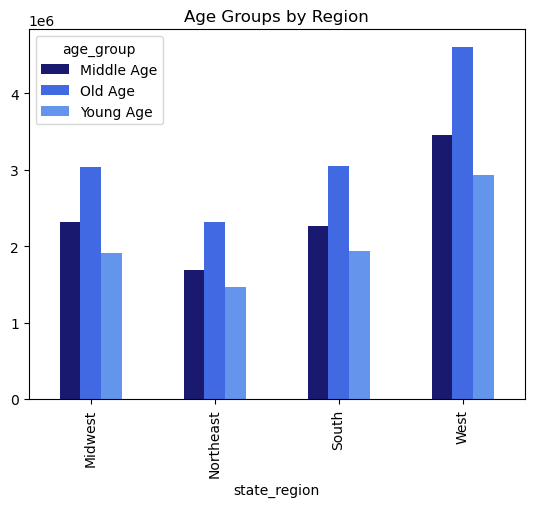

In [48]:
# Create Bar Chart for crosstab_age_region
bar_age_region = crosstab_age_region.plot.bar(title = 'Age Groups by Region', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [49]:
# Export bar_age_region
bar_age_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_region.png'))

Explore spending habits of the 3 age groups

In [50]:
# Check age_group frequency with spending_flag
crosstab_age_spending = pd.crosstab(df_complete['spending_flag'], df_complete['age_group'], dropna=False)

In [51]:
# Check Results of crosstab_age_spending
crosstab_age_spending

age_group,Middle Age,Old Age,Young Age
spending_flag,,,
High spender,201720,252194,149511
Low spender,9522518,12745837,8092784


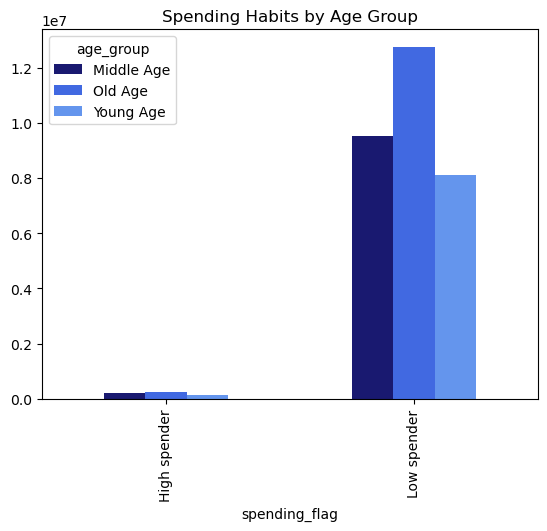

In [52]:
# Create Bar Chart for crosstab_age_spending
bar_age_spending = crosstab_age_spending.plot.bar(title = 'Spending Habits by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [53]:
# Export bar_age_spending
bar_age_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_spending.png'))

Explore ordering frequency of 3 age groups

In [54]:
# Check age_group ordering frequency with frequency_flag
crosstab_age_freq = pd.crosstab(df_complete['frequency_flag'],df_complete['age_group'], dropna = False)

In [55]:
# Check Results of crosstab_age_freq
crosstab_age_freq

age_group,Middle Age,Old Age,Young Age
frequency_flag,,,
Frequent customer,6670425,8899791,5634260
Non-frequent customer,911598,1216773,766604
Regular customer,2142215,2881467,1841431


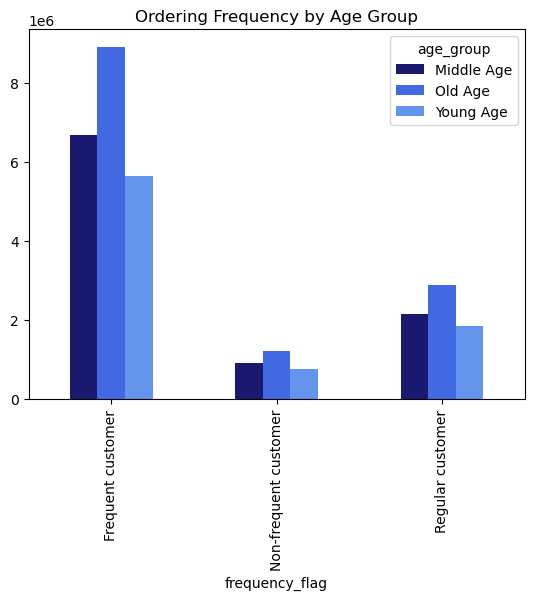

In [56]:
# Create Bar Chart for crosstab_age_freq
bar_age_freq = crosstab_age_freq.plot.bar(title = 'Ordering Frequency by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [57]:
# Export bar_age_freq
bar_age_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_frequency.png'))

Exploring ordering hours by 3 age groups

In [58]:
# Check age_group frequncy with order_hour_of_day
crosstab_age_ohod = pd.crosstab(df_complete['order_hour_of_day'], df_complete['age_group'], dropna = False)

In [59]:
# Check Results of crosstab_age_ohod
crosstab_age_ohod

age_group,Middle Age,Old Age,Young Age
order_hour_of_day,,,
0,65560,85561,56921
1,34733,45160,29728
2,20132,27197,18362
3,14667,20718,13411
4,14490,22407,13866
5,25196,36809,22413
6,85538,118370,77105
7,264513,368730,229970
8,522432,698722,437956


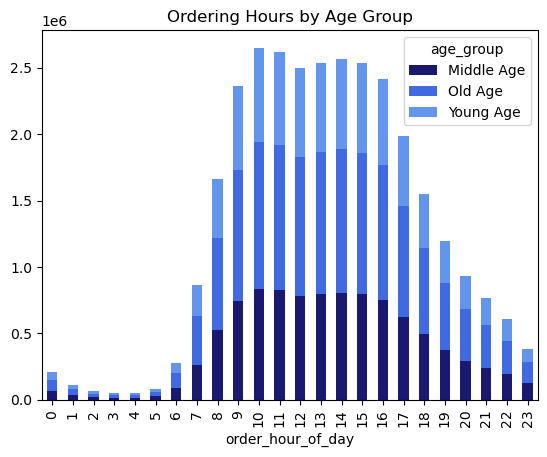

In [60]:
# Create Bar Chart for crosstab_age_ohod
bar_age_ohod = crosstab_age_ohod.plot.bar(title = 'Ordering Hours by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [61]:
# Export bar_age_ohod
bar_age_ohod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_ohod.png'))

Explore ordering days by 3 age groups

In [63]:
# Check age_group frequncy with orders_day_of_week
crosstab_age_odow = pd.crosstab(df_complete['orders_day_of_week'], df_complete['age_group'], dropna = False)

In [64]:
# Check Results of crosstab_age_odow
crosstab_age_odow

age_group,Middle Age,Old Age,Young Age
orders_day_of_week,,,
0,1854196,2478969,1575445
1,1694161,2260345,1457180
2,1268524,1691626,1064556
3,1152044,1546186,971305
4,1139757,1516519,968718
5,1267282,1692490,1073957
6,1348274,1811896,1131134


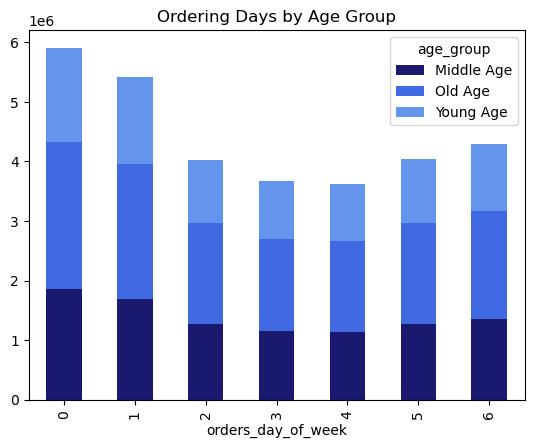

In [65]:
# Create Bar Chart for crosstab_age_odow
bar_age_odow = crosstab_age_odow.plot.bar(title = 'Ordering Days by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [66]:
# Export bar_age_odow
bar_age_odow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_odow.png'))

Exploring food departments ordered from by 3 age groups

In [67]:
# Check frequency of age_group with department
crosstab_age_dept = pd.crosstab(df_complete['department'], df_complete['age_group'], dropna = False)

In [68]:
# Check Results of crosstab_age_dept
crosstab_age_dept

age_group,Middle Age,Old Age,Young Age
department,,,
alcohol,45055,59355,40217
babies,134357,168735,107300
bakery,352133,469974,298721
beverages,806816,1088068,677017
breakfast,210891,279636,180323
bulk,10439,13991,9021
canned goods,317582,423707,270785
dairy eggs,1625233,2165648,1386301
deli,314763,422601,266470


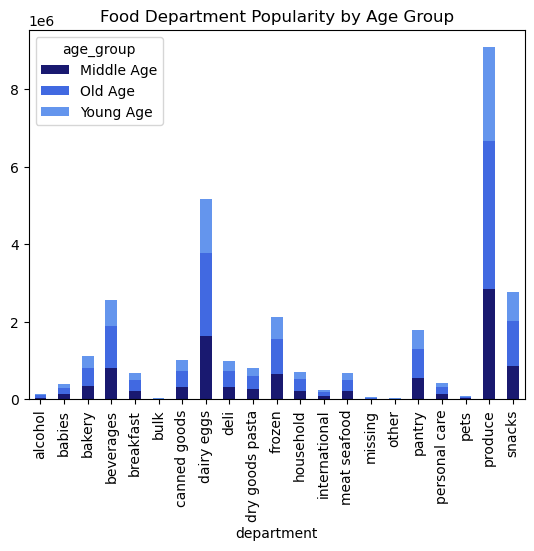

In [69]:
# Create Bar Chart for crosstab_age_dept
bar_age_dept = crosstab_age_dept.plot.bar(title = 'Food Department Popularity by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [70]:
# Export bar_age_ohod
bar_age_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_dept.png'))

Exploring price range of products per 3 age groups

In [63]:
# Check frequency of age_group with price_range_loc
crosstab_age_pricerange = pd.crosstab(df_complete['price_range_loc'], df_complete['age_group'], dropna = False)

In [65]:
# Check Results of crosstab_age_pricerange
crosstab_age_pricerange

age_group,Middle Age,Old Age,Young Age
price_range_loc,,,
High-range product,124064,168291,105598
Low-range product,3037174,4061055,2576611
Mid-range product,6563000,8768685,5560086


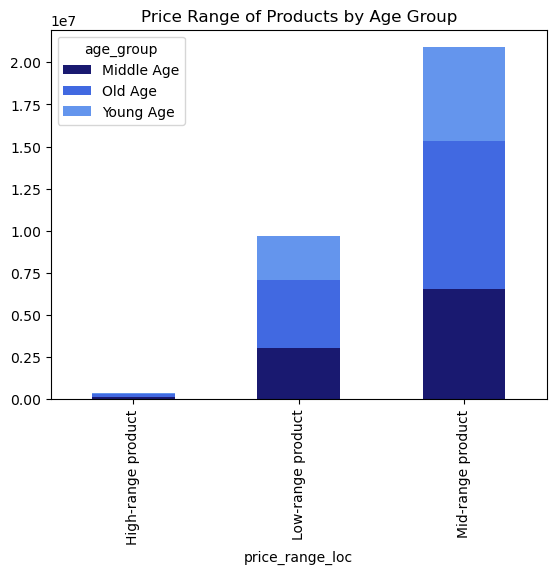

In [73]:
# Create Bar Chart for crosstab_age_pricerange
bar_age_price = crosstab_age_pricerange.plot.bar(title = 'Price Range of Products by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [74]:
# Export bar_age_price
bar_age_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_pricerange.png'))

Exploring loyalty per 3 age groups

In [64]:
# Check frequency of age_group with loyalty_flag
crosstab_age_loyal = pd.crosstab(df_complete['loyalty_flag'], df_complete['age_group'], dropna = False)

In [66]:
# Check Results of crosstab_age_loyal
crosstab_age_loyal

age_group,Middle Age,Old Age,Young Age
loyalty_flag,,,
Loyal customer,3238329,4330360,2715404
New customer,1491161,2030894,1281640
Regular customer,4994748,6636777,4245251


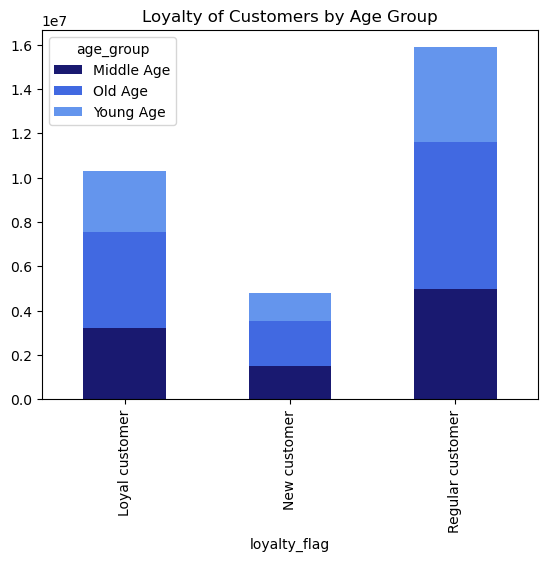

In [67]:
# Create Bar Chart for crosstab_age_loyal
bar_age_loyal = crosstab_age_loyal.plot.bar(title = 'Loyalty of Customers by Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [68]:
# Export bar_age_loyal
bar_age_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_age_loyalty.png'))

## Step 7 = Customer Profiling for More Relevant Marketing: Income

Create 3 groups based on income

In [75]:
# Check current shape of df_complete
df_complete.shape

(30964564, 34)

In [76]:
# Check current description of income
df_complete['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [19]:
# Group df_complete [income] into 3 different groups
df_complete.loc[(df_complete['income']<75000), 'income_group'] = 'Low Income'
df_complete.loc[(df_complete['income']>=75000) & (df_complete['income']<150000), 'income_group'] = 'Medium Income'
df_complete.loc[(df_complete['income']>=150000), 'income_group'] = 'High Income'

In [70]:
# Check results of income_group
df_complete['income_group'].value_counts(dropna = False)

income_group
Medium Income    17162609
Low Income        9906680
High Income       3895275
Name: count, dtype: int64

In [71]:
# Check results of income_group
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,department,state_region,customer_activity,age_group,income_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,New customer,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,New customer,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income


Look at frequency of income groups

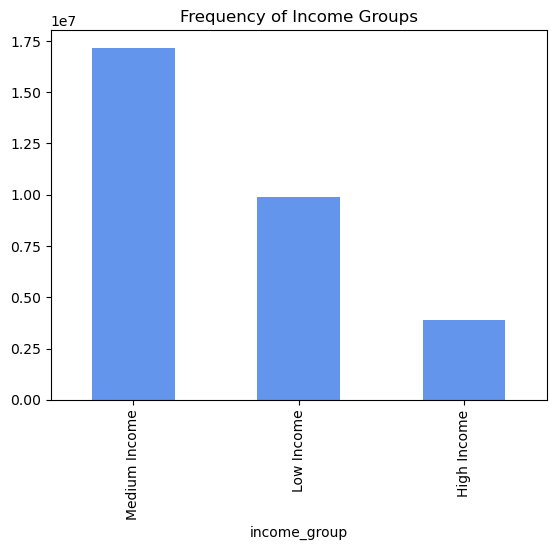

In [72]:
# Create Bar Chart for income_group
bar_incomegroup_1 = df_complete['income_group'].value_counts().plot.bar(title = 'Frequency of Income Groups', color = ['cornflowerblue'])

In [81]:
# Export bar_incomegroup_1
bar_incomegroup_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_incomegroups.png'))

Explore frequency of 3 income groups by region

In [82]:
# Checking frequency of income_group by region
crosstab_income_region = pd.crosstab(df_complete['state_region'], df_complete['income_group'], dropna = False)

In [83]:
# Check Results of crosstab_income_region
crosstab_income_region

income_group,High Income,Low Income,Medium Income
state_region,,,
Midwest,917495,2300529,4043489
Northeast,677730,1730006,3056949
South,910551,2310273,4031126
West,1389499,3565872,6031045


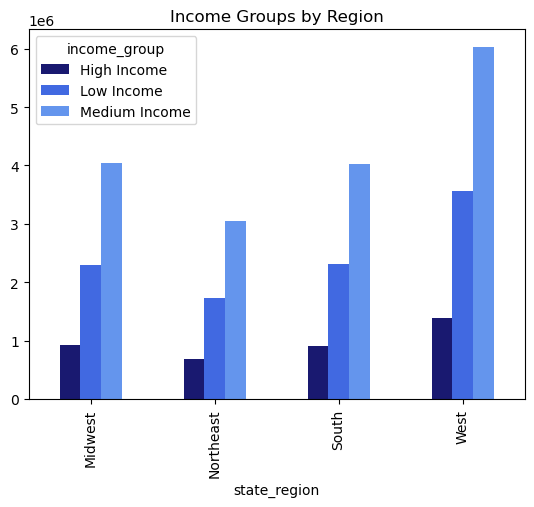

In [84]:
# Create Bar Chart for crosstab_income_region
bar_income_region = crosstab_income_region.plot.bar(title = 'Income Groups by Region', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [85]:
# Export bar_income_region
bar_income_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_region.png'))

Explore spending habits of 3 income groups

In [86]:
# Check income_group frequency with spending_flag
crosstab_income_spending = pd.crosstab(df_complete['spending_flag'], df_complete['income_group'], dropna = False)

In [87]:
# Check Results of crosstab_income_spending
crosstab_income_spending

income_group,High Income,Low Income,Medium Income
spending_flag,,,
High spender,388904,30197,184324
Low spender,3506371,9876483,16978285


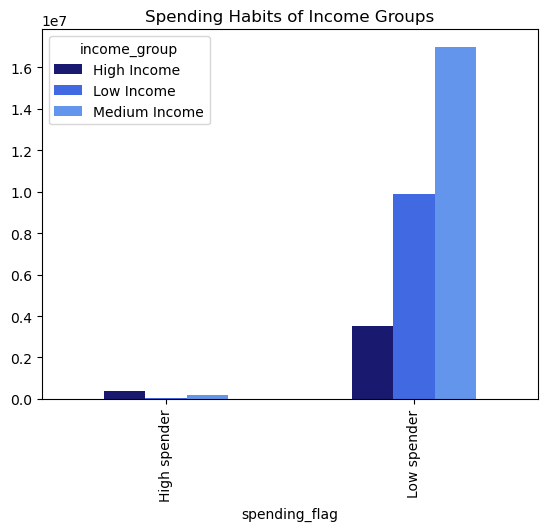

In [88]:
# Create Bar Chart for crosstab_income_spending
bar_income_spending = crosstab_income_spending.plot.bar(title = 'Spending Habits of Income Groups', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [89]:
# Export bar_income_spending
bar_income_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_spending.png'))

Explore ordering frequency of 3 age groups

In [90]:
# Check income_group ordering frequency with frequency_flag
crosstab_income_freq = pd.crosstab(df_complete['frequency_flag'], df_complete['income_group'], dropna = False)

In [91]:
# Check Results of crosstab_income_freq
crosstab_income_freq

income_group,High Income,Low Income,Medium Income
frequency_flag,,,
Frequent customer,2700205,6726009,11778262
Non-frequent customer,345292,984971,1564712
Regular customer,849778,2195700,3819635


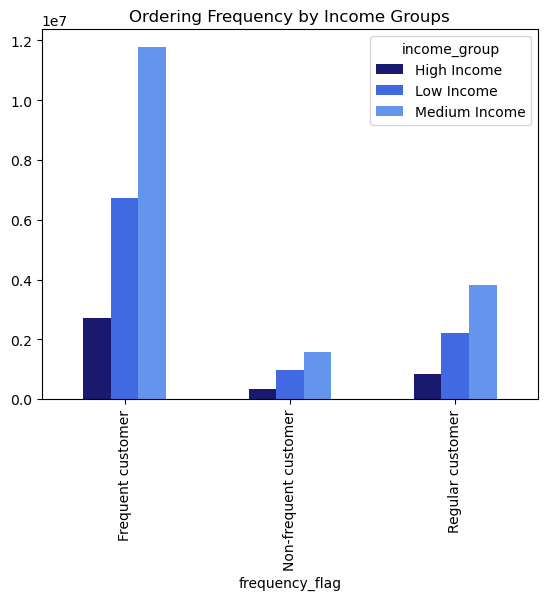

In [92]:
# Create Bar Chart for crosstab_income_freq
bar_income_freq = crosstab_income_freq.plot.bar(title = 'Ordering Frequency by Income Groups', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [93]:
# Export bar_income_freq
bar_income_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_frequency.png'))

Exploring ordering hours by income group

In [94]:
# Check income_group frequncy with order_hour_of_day
crosstab_income_ohod = pd.crosstab(df_complete['order_hour_of_day'], df_complete['income_group'], dropna = False)

In [95]:
# Check Results of crosstab_income_ohod
crosstab_income_ohod

income_group,High Income,Low Income,Medium Income
order_hour_of_day,,,
0,24847,65605,117590
1,13333,34814,61474
2,8432,22026,35233
3,6384,15796,26616
4,6696,15822,28245
5,10583,25607,48228
6,35401,88809,156803
7,112291,267600,483322
8,211414,527921,919775


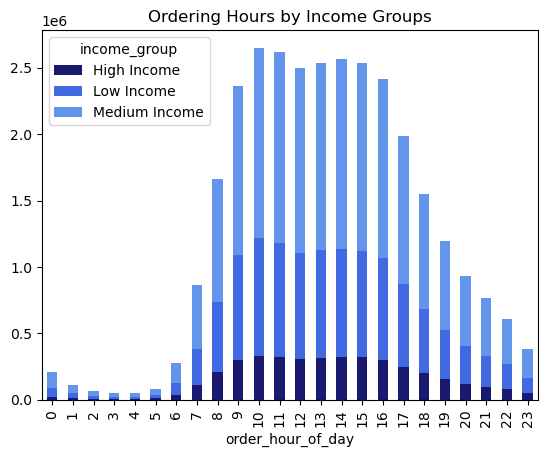

In [96]:
# Create Bar Chart for crosstab_income_ohod
bar_income_ohod = crosstab_income_ohod.plot.bar(title = 'Ordering Hours by Income Groups', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [97]:
# Export bar_income_ohod
bar_income_ohod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_ohod.png'))

Explore ordering days by income group

In [98]:
# Check income_group frequncy with orders_day_of_week
crosstab_income_odow = pd.crosstab(df_complete['orders_day_of_week'], df_complete['income_group'], dropna = False)

In [99]:
# Check Results of crosstab_income_odow
crosstab_income_odow

income_group,High Income,Low Income,Medium Income
orders_day_of_week,,,
0,752600,1774145,3381865
1,669479,1812846,2929361
2,500874,1321297,2202535
3,459665,1200388,2009482
4,457000,1189000,1978994
5,503310,1319601,2210818
6,552347,1289403,2449554


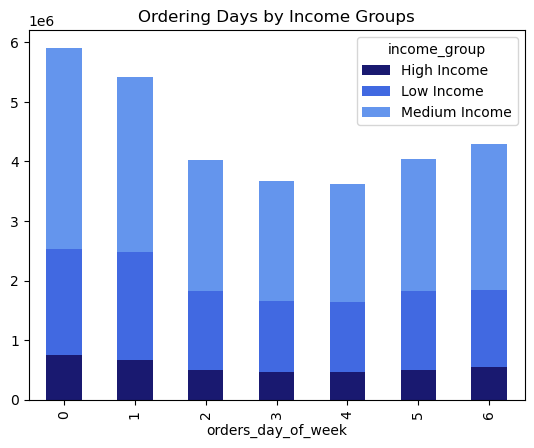

In [100]:
# Create Bar Chart for crosstab_income_odow
bar_income_odow = crosstab_income_odow.plot.bar(title = 'Ordering Days by Income Groups', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [101]:
# Export bar_income_odow
bar_income_odow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_odow.png'))

Exploring food departments ordered from by 3 income groups

In [102]:
# Check frequency of income_group with department
crosstab_income_dept = pd.crosstab(df_complete['department'], df_complete['income_group'], dropna = False)

In [103]:
# Check Results of crosstab_income_dept
crosstab_income_dept

income_group,High Income,Low Income,Medium Income
department,,,
alcohol,24067,44576,75984
babies,53001,114785,242606
bakery,148444,341470,630914
beverages,313379,911389,1347133
breakfast,83422,233059,354369
bulk,3671,11926,17854
canned goods,132414,295130,584530
dairy eggs,659249,1600647,2917286
deli,125893,318815,559126


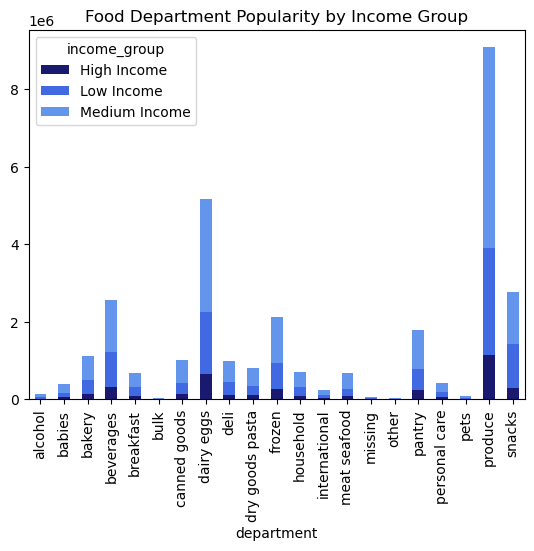

In [104]:
# Create Bar Chart for crosstab_income_dept
bar_income_dept = crosstab_income_dept.plot.bar(title = 'Food Department Popularity by Income Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [105]:
# Export bar_income_dept
bar_income_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_department.png'))

Exploring price range of products per 3 income groups

In [106]:
# Check frequency of income_group with price_range_loc
crosstab_income_pricerange = pd.crosstab(df_complete['price_range_loc'], df_complete['income_group'], dropna = False)

In [107]:
# Check Results of crosstab_income_pricerange
crosstab_income_pricerange

income_group,High Income,Low Income,Medium Income
price_range_loc,,,
High-range product,57128,100856,239969
Low-range product,1161971,3415472,5097397
Mid-range product,2676176,6390352,11825243


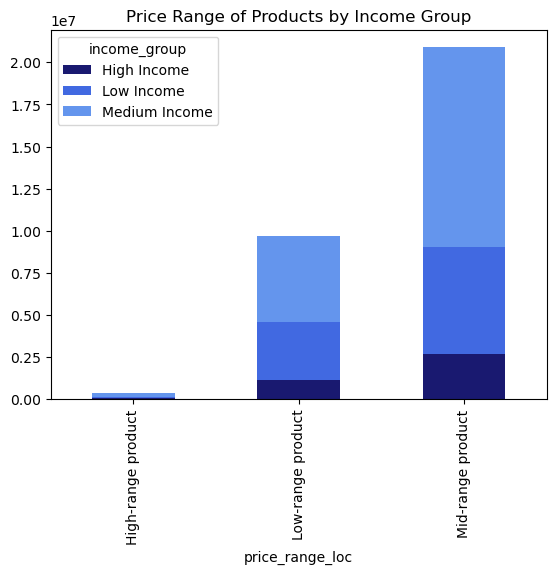

In [108]:
# Create Bar Chart for crosstab_income_pricerange
bar_income_price = crosstab_income_pricerange.plot.bar(title = 'Price Range of Products by Income Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [109]:
# Export bar_income_price
bar_income_price.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_pricerange.png'))

Exploring loyalty per 3 income groups

In [73]:
# Check frequency of income_group with loyalty_flag
crosstab_income_loyal = pd.crosstab(df_complete['loyalty_flag'], df_complete['income_group'], dropna = False)

In [74]:
# Check Results of crosstab_income_loyal
crosstab_income_loyal

income_group,High Income,Low Income,Medium Income
loyalty_flag,,,
Loyal customer,1310941,3238297,5734855
New customer,575479,1632586,2595630
Regular customer,2008855,5035797,8832124


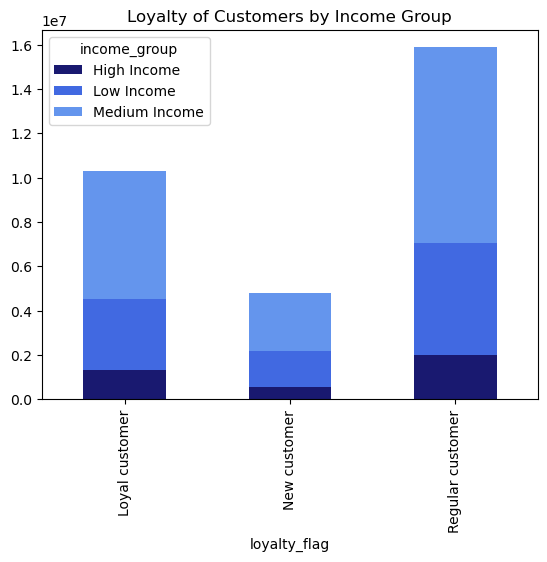

In [75]:
# Create Bar Chart for crosstab_income_loyal
bar_income_loyal = crosstab_income_loyal.plot.bar(title = 'Loyalty of Customers by Income Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [76]:
# Export bar_income_loyal
bar_income_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_loyalty.png'))

Exploring age group of customers for 3 income groups

In [110]:
# Check frequency of age_group within income_group
crosstab_income_age = pd.crosstab(df_complete['age_group'], df_complete['income_group'], dropna = False)

In [111]:
# Check Results of crosstab_income_age
crosstab_income_age

income_group,High Income,Low Income,Medium Income
age_group,,,
Middle Age,1351953,2853301,5518984
Old Age,2467570,1990753,8539708
Young Age,75752,5062626,3103917


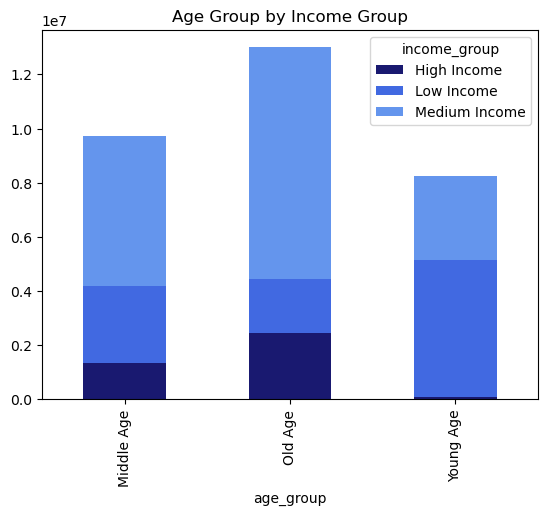

In [112]:
# Create Bar Chart for crosstab_income_age
bar_income_age = crosstab_income_age.plot.bar(title = 'Age Group by Income Group', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [113]:
# Export bar_income_age
bar_income_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_income_age.png'))

## Step 8 = Customer Profiling for More Relevant Marketing: Goods (Alcohol)

Create 2 groups: Buys Alcohol, No Alcohol

In [20]:
# Group df_complete [department_id] into 2 different groups
df_complete.loc[df_complete['department_id']==5,'alcohol_customers']='Buys Alcohol'
df_complete.loc[df_complete['department_id']!=5, 'alcohol_customers']='No Alcohol'

In [115]:
# Check results of alcohol_customers
df_complete['alcohol_customers'].value_counts(dropna = False)

alcohol_customers
No Alcohol      30819937
Buys Alcohol      144627
Name: count, dtype: int64

In [116]:
# Check results of alcohol_customers
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,mean_price,spending_flag,median_days,frequency_flag,department,state_region,customer_activity,age_group,income_group,alcohol_customers
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol


Look at Frequency of alcohol buyers

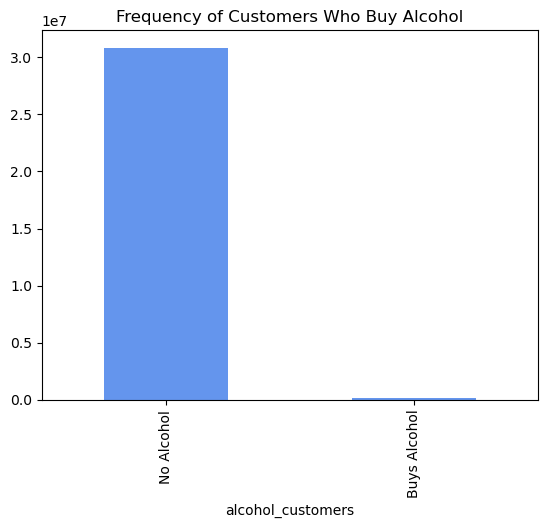

In [117]:
# Create Bar Chart for alcohol_customers
bar_alcohol_1 = df_complete['alcohol_customers'].value_counts().plot.bar(title = 'Frequency of Customers Who Buy Alcohol', color = ['cornflowerblue'])

In [118]:
# Export bar_alcohol_1
bar_alcohol_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol.png'))

Explore alcohol buyer by region

In [119]:
# Check alcohol_customers frequency by region
crosstab_alcohol_region = pd.crosstab(df_complete['state_region'], df_complete['alcohol_customers'], dropna = False)

In [120]:
# Check Results of crosstab_alcohol_region
crosstab_alcohol_region

alcohol_customers,Buys Alcohol,No Alcohol
state_region,,
Midwest,34043,7227470
Northeast,25017,5439668
South,33867,7218083
West,51700,10934716


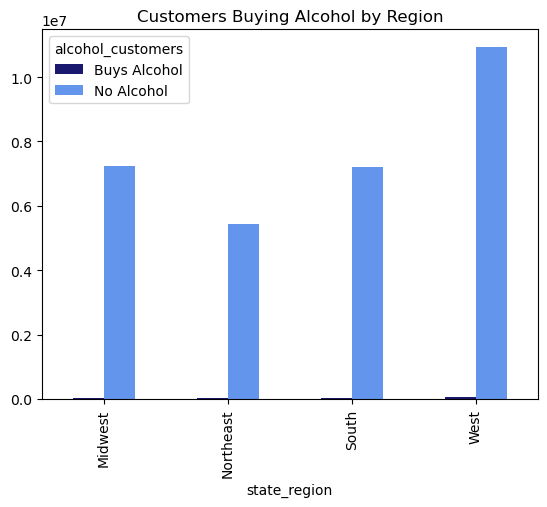

In [121]:
# Create Bar Chart for crosstab_alcohol_region
bar_alcohol_region = crosstab_alcohol_region.plot.bar(title = 'Customers Buying Alcohol by Region', color = ['midnightblue', 'cornflowerblue'])

In [122]:
# Export bar_alcohol_region
bar_alcohol_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol_region.png'))

Explore spending habits with buying alcohol

In [132]:
# Check alcohol_customers frequency with spending_flag
crosstab_alcohol_spending = pd.crosstab(df_complete['spending_flag'], df_complete['alcohol_customers'], dropna = False)

In [133]:
# Check Results of crosstab_alcohol_spending
crosstab_alcohol_spending

alcohol_customers,Buys Alcohol,No Alcohol
spending_flag,,
High spender,12803,590622
Low spender,131824,30229315


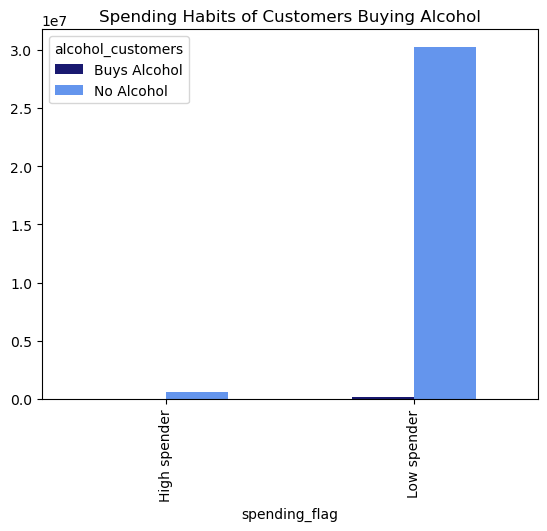

In [134]:
# Create Bar Chart for crosstab_alcohol_spending
bar_alcohol_spending = crosstab_alcohol_spending.plot.bar(title = 'Spending Habits of Customers Buying Alcohol', color = ['midnightblue', 'cornflowerblue'])

In [135]:
# Export bar_alcohol_spending
bar_alcohol_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol_spending.png'))

Explore income_group with frequency of buying alcohol

In [136]:
# Check buying alcohol frequency with income_group
crosstab_alcohol_income = pd.crosstab(df_complete['income_group'], df_complete['alcohol_customers'], dropna = False)

In [137]:
# Check Results of crosstab_alcohol_income
crosstab_alcohol_income

alcohol_customers,Buys Alcohol,No Alcohol
income_group,,
High Income,24067,3871208
Low Income,44576,9862104
Medium Income,75984,17086625


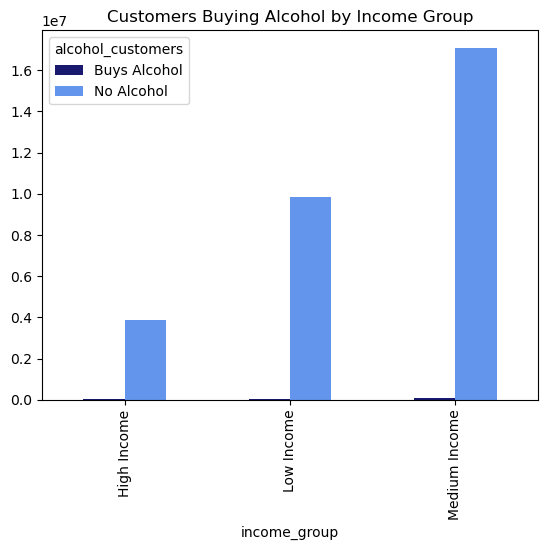

In [138]:
# Create Bar Chart for crosstab_alcohol_spending
bar_alcohol_income = crosstab_alcohol_income.plot.bar(title = 'Customers Buying Alcohol by Income Group', color = ['midnightblue', 'cornflowerblue'])

In [139]:
# Export bar_alcohol_income
bar_alcohol_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol_income.png'))

Explore customer frequency with buying alcohol

In [140]:
# Check alcohol ordering frequency with frequency_flag
crosstab_alcohol_freq = pd.crosstab(df_complete['frequency_flag'], df_complete['alcohol_customers'], dropna = False)

In [141]:
# Check Results of crosstab_alcohol_freq
crosstab_alcohol_freq

alcohol_customers,Buys Alcohol,No Alcohol
frequency_flag,,
Frequent customer,100491,21103985
Non-frequent customer,13271,2881704
Regular customer,30865,6834248


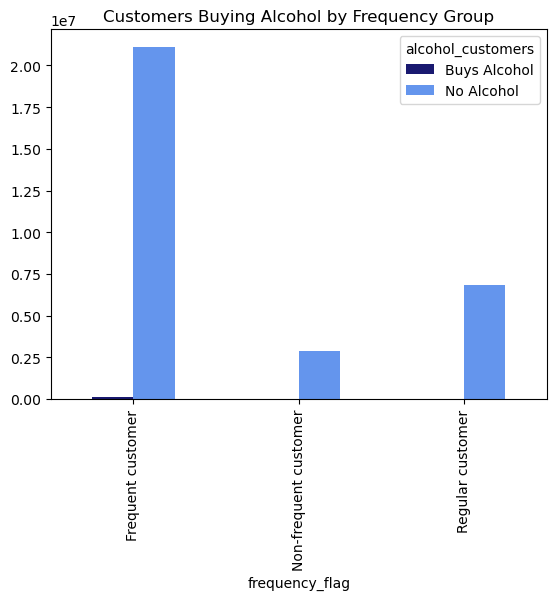

In [142]:
# Create Bar Chart for crosstab_alcohol_freq
bar_alcohol_freq = crosstab_alcohol_freq.plot.bar(title = 'Customers Buying Alcohol by Frequency Group', color = ['midnightblue', 'cornflowerblue'])

In [143]:
# Export bar_alcohol_freq
bar_alcohol_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol_frequency.png'))

Explore age group and buying alcohol

In [304]:
# Check alcohol ordering frequency with age_group
crosstab_alcohol_age = pd.crosstab(df_complete['age_group'], df_complete['alcohol_customers'], dropna = False)

In [305]:
# Check Results of crosstab_alcohol_age
crosstab_alcohol_age

alcohol_customers,Buys Alcohol,No Alcohol
age_group,,
Middle Age,45055,9679183
Old Age,59355,12938676
Young Age,40217,8202078


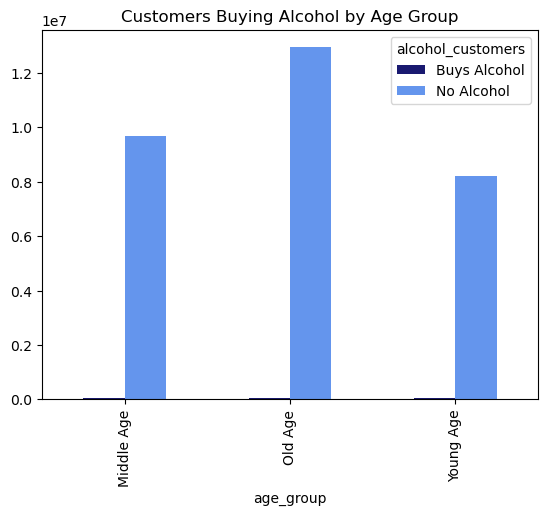

In [306]:
# Create Bar Chart for crosstab_alcohol_age
bar_alcohol_age = crosstab_alcohol_age.plot.bar(title = 'Customers Buying Alcohol by Age Group', color = ['midnightblue', 'cornflowerblue'])

In [307]:
# Export bar_alcohol_age
bar_alcohol_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_alcohol_age.png'))

## Step 9 = Customer Profiling for More Relevant Marketing: Goods (Canned Goods)

Create 2 groups: Buys Canned Goods, No Canned Goods

In [21]:
# Group df_complete [department_id] into 2 different groups
df_complete.loc[df_complete['department_id']==15,'canned_customers']='Buys Canned Goods'
df_complete.loc[df_complete['department_id']!=15, 'canned_customers']='No Canned Goods'

In [145]:
# Check results of canned_customers
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,spending_flag,median_days,frequency_flag,department,state_region,customer_activity,age_group,income_group,alcohol_customers,canned_customers
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol,No Canned Goods
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol,No Canned Goods
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,No Alcohol,No Canned Goods
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol,No Canned Goods
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol,No Canned Goods
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol,No Canned Goods
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,No Alcohol,No Canned Goods
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol,No Canned Goods
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol,No Canned Goods
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,No Alcohol,No Canned Goods


Look at Frequency of canned food buyers

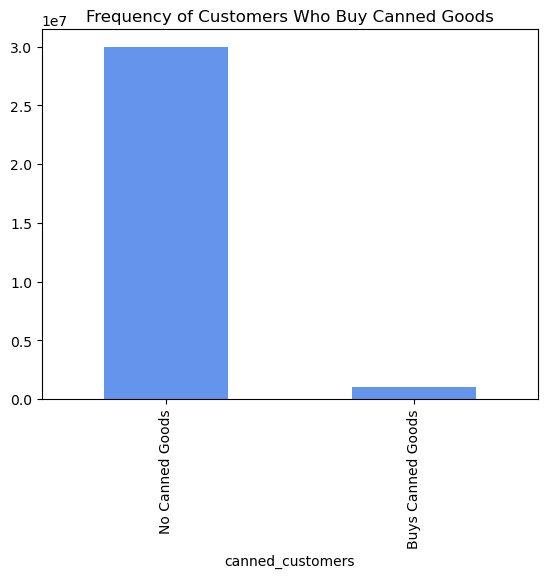

In [146]:
# Create Bar Chart for canned_customers
bar_canned_1 = df_complete['canned_customers'].value_counts().plot.bar(title = 'Frequency of Customers Who Buy Canned Goods', color = ['cornflowerblue'])

In [213]:
# Export bar_canned_1
bar_canned_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned.png'))

Explore canned goods buyer by region

In [147]:
# Check canned_customers frequency by region
crosstab_canned_region = pd.crosstab(df_complete['state_region'], df_complete['canned_customers'], dropna = False)

In [148]:
# Check Results of crosstab_canned_region
crosstab_canned_region

canned_customers,Buys Canned Goods,No Canned Goods
state_region,,
Midwest,237459,7024054
Northeast,176936,5287749
South,236696,7015254
West,360983,10625433


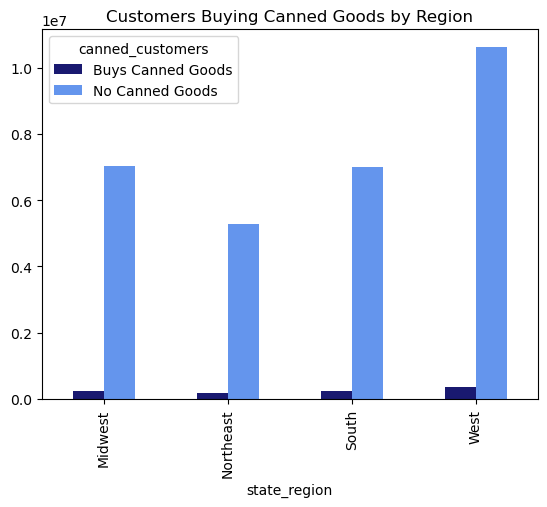

In [149]:
# Create Bar Chart for crosstab_canned_region
bar_canned_region = crosstab_canned_region.plot.bar(title = 'Customers Buying Canned Goods by Region', color = ['midnightblue', 'cornflowerblue'])

In [150]:
# Export bar_canned_region
bar_canned_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned_region.png'))

Explore spending habits with buying canned goods

In [151]:
# Check canned_customers frequency with spending_flag
crosstab_canned_spending = pd.crosstab(df_complete['spending_flag'], df_complete['canned_customers'], dropna = False)

In [152]:
# Check Results of crosstab_canned_spending
crosstab_canned_spending

canned_customers,Buys Canned Goods,No Canned Goods
spending_flag,,
High spender,20432,582993
Low spender,991642,29369497


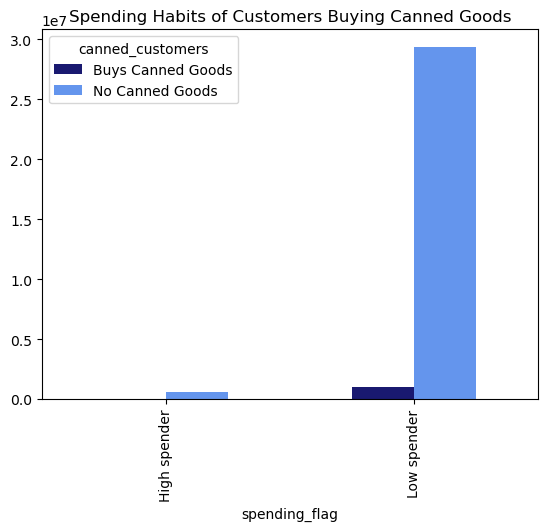

In [153]:
# Create Bar Chart for crosstab_canned_spending
bar_canned_spending = crosstab_canned_spending.plot.bar(title = 'Spending Habits of Customers Buying Canned Goods', color = ['midnightblue', 'cornflowerblue'])

In [154]:
# Export bar_canned_spending
bar_canned_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned_spending.png'))

Explore income_group with frequency of byuing canned goods

In [155]:
# Check buying canned goods frequency with income_group
crosstab_canned_income = pd.crosstab(df_complete['income_group'], df_complete['canned_customers'], dropna = False)

In [156]:
# Check Results of crosstab_canned_income
crosstab_canned_income

canned_customers,Buys Canned Goods,No Canned Goods
income_group,,
High Income,132414,3762861
Low Income,295130,9611550
Medium Income,584530,16578079


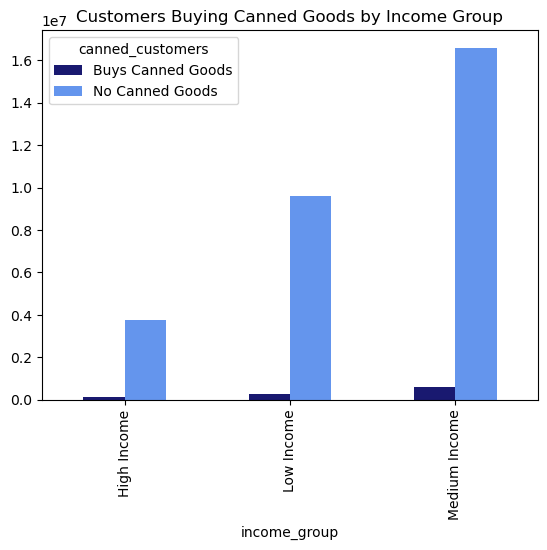

In [157]:
# Create Bar Chart for crosstab_canned_income
bar_canned_income = crosstab_canned_income.plot.bar(title = 'Customers Buying Canned Goods by Income Group', color = ['midnightblue', 'cornflowerblue'])

In [158]:
# Export bar_canned_income
bar_canned_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned_income.png'))

Explore customer frequency with buying alcohol

In [159]:
# Check canned goods ordering frequency with frequency_flag
crosstab_canned_freq = pd.crosstab(df_complete['frequency_flag'], df_complete['canned_customers'], dropna = False)

In [160]:
# Check Results of crosstab_canned_freq
crosstab_canned_freq

canned_customers,Buys Canned Goods,No Canned Goods
frequency_flag,,
Frequent customer,658729,20545747
Non-frequent customer,108011,2786964
Regular customer,245334,6619779


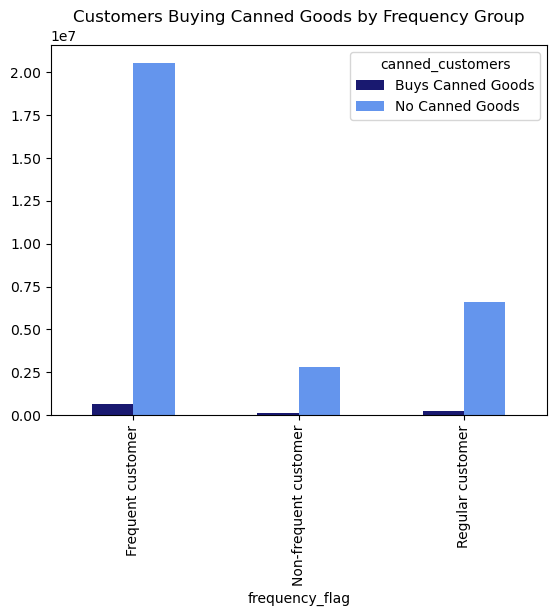

In [161]:
# Create Bar Chart for crosstab_canned_freq
bar_canned_freq = crosstab_canned_freq.plot.bar(title = 'Customers Buying Canned Goods by Frequency Group', color = ['midnightblue', 'cornflowerblue'])

In [162]:
# Export bar_canned_freq
bar_canned_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned_frequency.png'))

Explore age group and buying canned goods

In [163]:
# Check canned ordering frequency with age_group
crosstab_canned_age = pd.crosstab(df_complete['age_group'], df_complete['canned_customers'], dropna = False)

In [164]:
# Check Results of crosstab_canned_age
crosstab_canned_age

canned_customers,Buys Canned Goods,No Canned Goods
age_group,,
Middle Age,317582,9406656
Old Age,423707,12574324
Young Age,270785,7971510


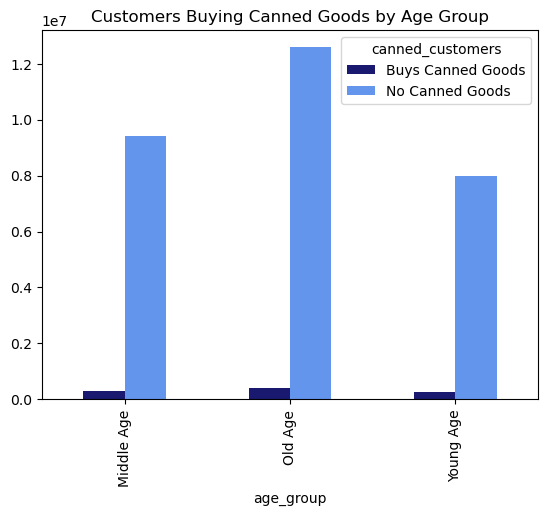

In [165]:
# Create Bar Chart for crosstab_canned_age
bar_canned_age = crosstab_canned_age.plot.bar(title = 'Customers Buying Canned Goods by Age Group', color = ['midnightblue', 'cornflowerblue'])

In [166]:
# Export bar_canned_age
bar_canned_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_canned_age.png'))

## Step 10 = Customer Profiling for More Relevant Marketing: Family Status

In [167]:
# Check shape of current df_complete
df_complete.shape

(30964564, 37)

In [168]:
# Check current description of fam_status
df_complete['fam_status'].describe()

count     30964564
unique           4
top        married
freq      21743711
Name: fam_status, dtype: object

In [22]:
# Group df_complete [fam_status] into different groups (Married with dependants, Married with NO dependants)
df_complete.loc[(df_complete['fam_status']=='married') & (df_complete['number_of_dependants']==1), 'family_group'] = 'Married with NO Dependants'
df_complete.loc[(df_complete['fam_status']=='married') & (df_complete['number_of_dependants']>1), 'family_group'] = 'Married with Dependants'

In [23]:
# Group df_complete [fam_status] into different groups (Single with dependants, Single with NO dependants)
df_complete.loc[(df_complete['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_complete['number_of_dependants']==0), 'family_group'] = 'Single with NO Dependants'
df_complete.loc[(df_complete['fam_status'].isin(['divorced/widowed', 'living with parents and siblings', 'single'])) & (df_complete['number_of_dependants']>=1), 'family_group'] = 'Single with Dependants'

In [24]:
# Check results of family_group
df_complete['family_group'].value_counts(dropna = False)

family_group
Married with Dependants       14532650
Single with NO Dependants      7739681
Married with NO Dependants     7211061
Single with Dependants         1481172
Name: count, dtype: int64

In [80]:
# Check results of family_group
df_complete.head(20)

,user_id,gender,state,age,date_joined,number_of_dependants,fam_status,income,order_id,order_number,...,mean_price,spending_flag,median_days,frequency_flag,department,state_region,customer_activity,age_group,income_group,family_group
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,Married with Dependants
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,Married with Dependants
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,...,7.988889,Low spender,19.0,Regular customer,beverages,Midwest,High-activity Customer,Middle Age,High Income,Married with Dependants
3,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,Single with NO Dependants
4,33890,Female,New Mexico,36,1/1/2017,0,single,59285,474720,4,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,Single with NO Dependants
5,33890,Female,New Mexico,36,1/1/2017,0,single,59285,896617,5,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,Single with NO Dependants
6,33890,Female,New Mexico,36,1/1/2017,0,single,59285,1044841,3,...,7.057534,Low spender,26.0,Non-frequent customer,beverages,West,High-activity Customer,Middle Age,Low Income,Single with NO Dependants
7,65803,Male,Idaho,35,1/1/2017,2,married,99568,3233494,6,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,Married with Dependants
8,65803,Male,Idaho,35,1/1/2017,2,married,99568,142275,8,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,Married with Dependants
9,65803,Male,Idaho,35,1/1/2017,2,married,99568,3114332,9,...,8.375962,Low spender,7.0,Frequent customer,beverages,West,High-activity Customer,Middle Age,Medium Income,Married with Dependants


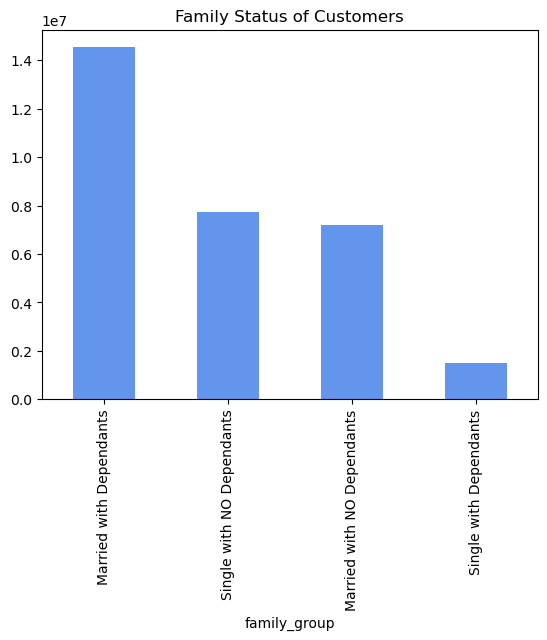

In [81]:
# Create Bar Chart for family_group
bar_fam_1 = df_complete['family_group'].value_counts().plot.bar(title = 'Family Status of Customers', color = ['cornflowerblue'])

In [174]:
# Export bar_fam_1
bar_fam_1.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family.png'))

Explore family status by region

In [175]:
# Check family_group by region
crosstab_fam_region = pd.crosstab(df_complete['state_region'], df_complete['family_group'], dropna = False)

In [176]:
# Check Results of crosstab_fam_region
crosstab_fam_region

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
state_region,,,,
Midwest,3367591,1719671,351435,1822816
Northeast,2564228,1289545,256430,1354482
South,3426123,1673767,359291,1792769
West,5174708,2528078,514016,2769614


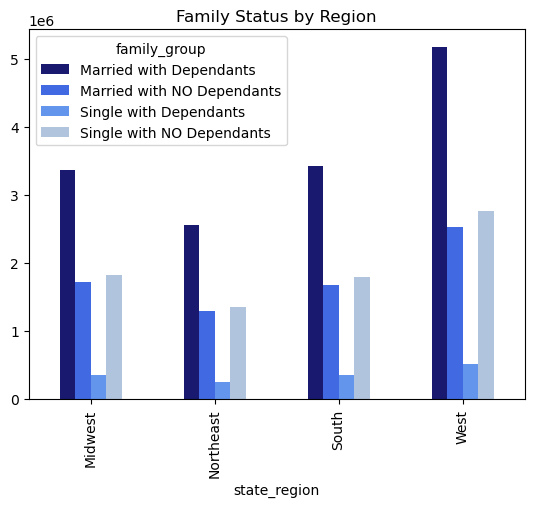

In [177]:
# Create Bar Chart for crosstab_fam_region
bar_fam_region = crosstab_fam_region.plot.bar(title = 'Family Status by Region', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [178]:
# Export bar_fam_region
bar_fam_region.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_region.png'))

Explore spending habits by family status

In [179]:
# Check family_group frequency with spending_flag
crosstab_fam_spending = pd.crosstab(df_complete['spending_flag'], df_complete['family_group'], dropna=False)

In [180]:
# Check Results of crosstab_fam_spending
crosstab_fam_spending

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
spending_flag,,,,
High spender,295505,133952,27926,146042
Low spender,14237145,7077109,1453246,7593639


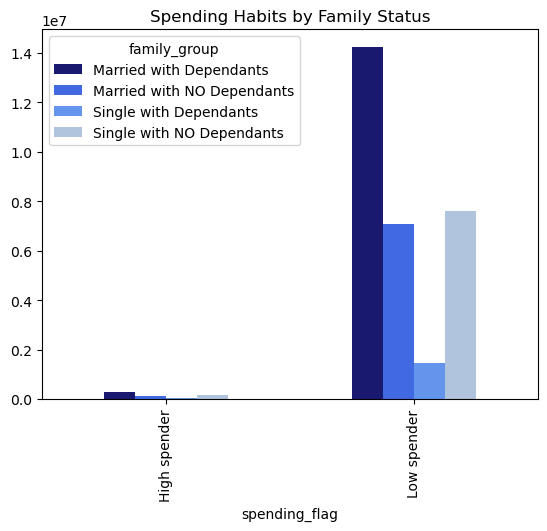

In [181]:
# Create Bar Chart for crosstab_fam_spending
bar_fam_spending = crosstab_fam_spending.plot.bar(title = 'Spending Habits by Family Status', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [182]:
# Export bar_fam_spending
bar_fam_spending.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_spending.png'))

Explore family status by income group

In [183]:
# Check family_group by income_group
crosstab_fam_income = pd.crosstab(df_complete['income_group'], df_complete['family_group'], dropna = False)

In [184]:
# Check Results of crosstab_fam_income
crosstab_fam_income

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
income_group,,,,
High Income,1923208,960090,14970,997007
Low Income,4379014,2157970,895088,2474608
Medium Income,8230428,4093001,571114,4268066


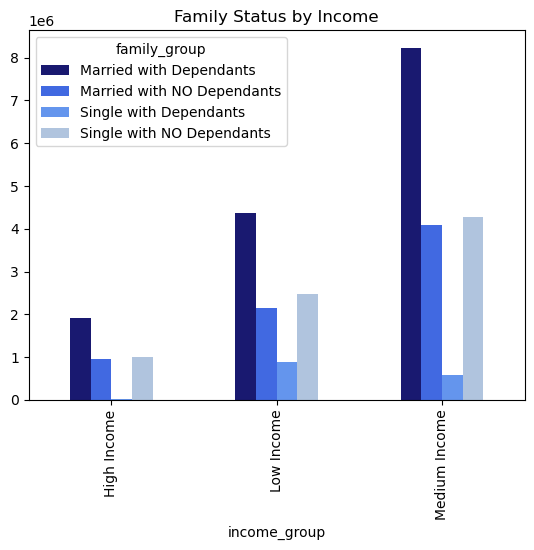

In [185]:
# Create Bar Chart for crosstab_fam_region
bar_fam_income = crosstab_fam_income.plot.bar(title = 'Family Status by Income', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [186]:
# Export bar_fam_income
bar_fam_income.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_income.png'))

Explore customer frequency with family status

In [187]:
# Check family_group with frequency_flag
crosstab_fam_freq = pd.crosstab(df_complete['frequency_flag'], df_complete['family_group'], dropna = False)

In [188]:
# Check Results of crosstab_fam_freq
crosstab_fam_freq

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
frequency_flag,,,,
Frequent customer,9942325,4946500,1030514,5285137
Non-frequent customer,1349451,690372,138646,716506
Regular customer,3240874,1574189,312012,1738038


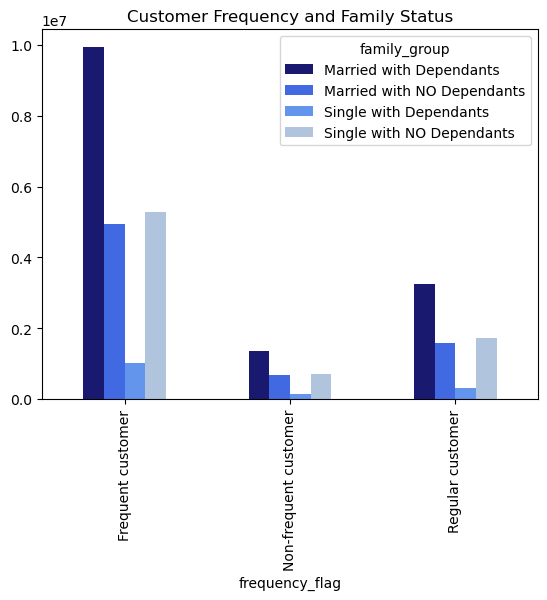

In [189]:
# Create Bar Chart for crosstab_fam_freq
bar_fam_freq = crosstab_fam_freq.plot.bar(title = 'Customer Frequency and Family Status', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [190]:
# Export bar_fam_freq
bar_fam_freq.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_frequency.png'))

Explore family status and age groups

In [191]:
# Check family_group with age_group
crosstab_fam_age = pd.crosstab(df_complete['age_group'], df_complete['family_group'], dropna = False)

In [192]:
# Check Results of crosstab_fam_age
crosstab_fam_age

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
age_group,,,,
Middle Age,4851647,2470190,0,2402401
Old Age,6521250,3203059,0,3273722
Young Age,3159753,1537812,1481172,2063558


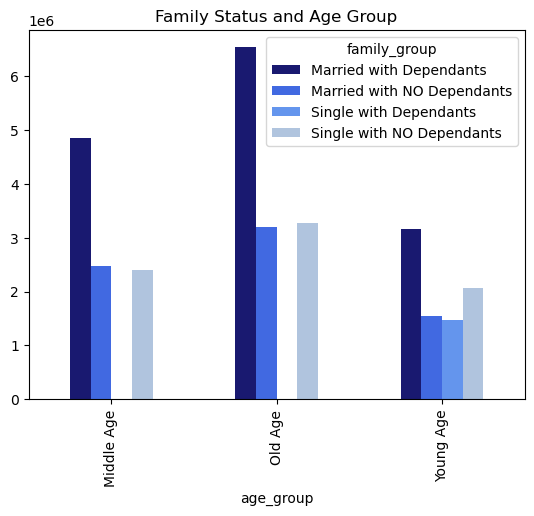

In [193]:
# Create Bar Chart for crosstab_fam_age
bar_fam_age = crosstab_fam_age.plot.bar(title = 'Family Status and Age Group', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [194]:
# Export bar_fam_age
bar_fam_age.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_age.png'))

Exploring ordering hours by family status

In [195]:
# Check family_group frequncy with order_hour_of_day
crosstab_fam_ohod = pd.crosstab(df_complete['order_hour_of_day'], df_complete['family_group'], dropna = False)

In [196]:
# Check Results of crosstab_fam_ohod
crosstab_fam_ohod

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
order_hour_of_day,,,,
0,98490,47461,10657,51434
1,51606,25728,5556,26731
2,29965,15505,3489,16732
3,22907,10978,2536,12375
4,23249,12515,2794,12205
5,38667,20130,4337,21284
6,130582,64695,14866,70870
7,402948,197965,42229,220071
8,779036,388300,75827,415947


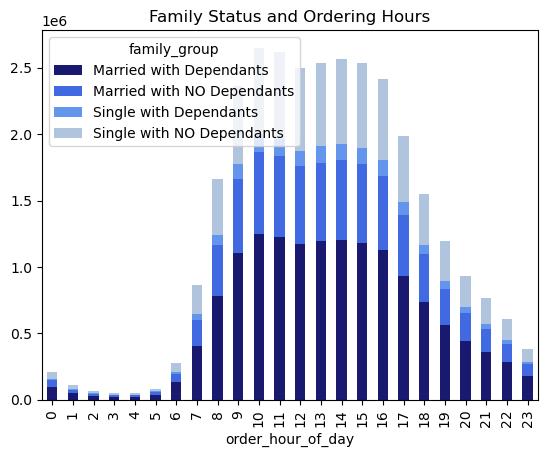

In [197]:
# Create Bar Chart for crosstab_fam_ohod
bar_fam_ohod = crosstab_fam_ohod.plot.bar(title = 'Family Status and Ordering Hours', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'], stacked = True)

In [198]:
# Export bar_fam_ohod
bar_fam_ohod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_ohod.png'))

Exploring ordering days by family status

In [199]:
# Check family_group frequncy with orders_day_of_week
crosstab_fam_odow = pd.crosstab(df_complete['orders_day_of_week'], df_complete['family_group'], dropna = False)

In [200]:
# Check Results of crosstab_fam_odow
crosstab_fam_odow

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
orders_day_of_week,,,,
0,2776501,1374203,280828,1477078
1,2531968,1257886,259482,1362350
2,1897086,932673,192366,1002581
3,1725584,852491,174418,917042
4,1697567,848954,173214,905259
5,1883740,940355,195460,1014174
6,2020204,1004499,205404,1061197


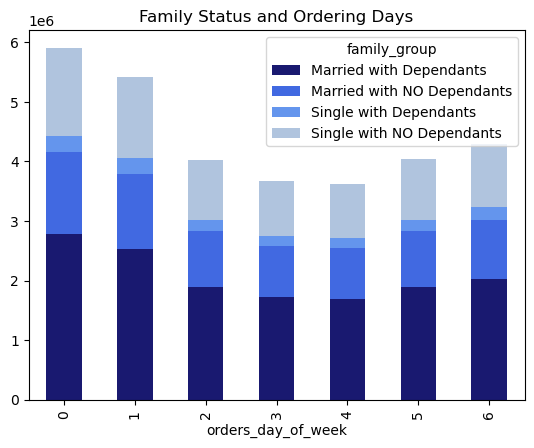

In [201]:
# Create Bar Chart for crosstab_fam_odow
bar_fam_odow = crosstab_fam_odow.plot.bar(title = 'Family Status and Ordering Days', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'], stacked = True)

In [202]:
# Export bar_fam_odow
bar_fam_odow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_odow.png'))

Explore family status and food departments

In [203]:
# Check frequency of family_group with department
crosstab_fam_dept = pd.crosstab(df_complete['department'], df_complete['family_group'], dropna = False)

In [204]:
# Check Results of crosstab_fam_dept
crosstab_fam_dept

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
department,,,,
alcohol,66171,33250,8379,36827
babies,194848,92835,19381,103328
bakery,523567,262182,53684,281395
beverages,1209634,597819,119107,645341
breakfast,313272,157948,33198,166432
bulk,15724,8094,1633,8000
canned goods,476452,236125,48477,251020
dairy eggs,2421459,1211140,250207,1294376
deli,470594,231739,48119,253382


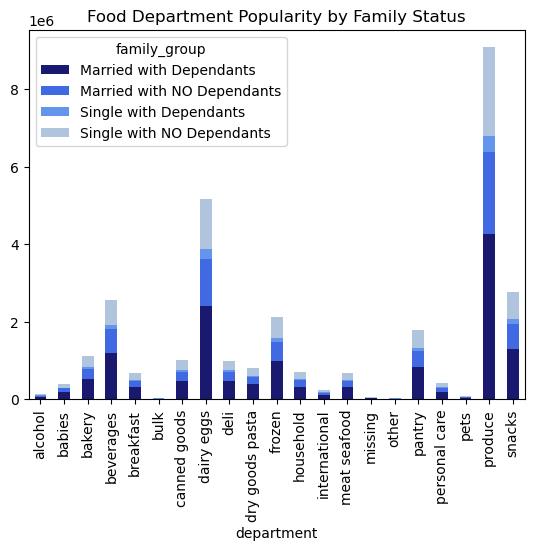

In [205]:
# Create Bar Chart for crosstab_fam_dept
bar_fam_dept = crosstab_fam_dept.plot.bar(title = 'Food Department Popularity by Family Status', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'], stacked = True)

In [206]:
# Export bar_fam_dept
bar_fam_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_department.png'))

Explore price range of products by family status

In [207]:
# Check frequency of family_group with price_range_loc
crosstab_fam_pricerange = pd.crosstab(df_complete['price_range_loc'], df_complete['family_group'], dropna = False)

In [208]:
# Check Results of crosstab_fam_pricerange
crosstab_fam_pricerange

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
price_range_loc,,,,
High-range product,188385,93116,18997,97455
Low-range product,4544742,2249053,461807,2419238
Mid-range product,9799523,4868892,1000368,5222988


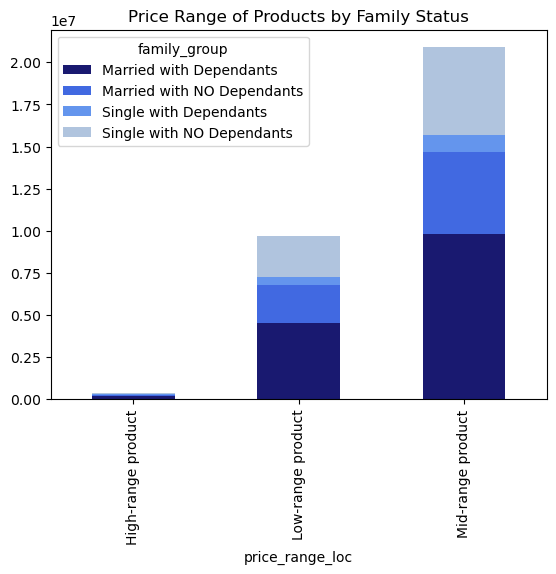

In [209]:
# Create Bar Chart for crosstab_fam_pricerange
bar_fam_pricerange = crosstab_fam_pricerange.plot.bar(title = 'Price Range of Products by Family Status', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'], stacked = True)

In [210]:
# Export bar_fam_pricerange
bar_fam_pricerange.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_pricerange.png'))

Explore loyalty by family status

In [82]:
# Check frequency of family_group with loyalty_flag
crosstab_fam_loyal = pd.crosstab(df_complete['loyalty_flag'], df_complete['family_group'], dropna = False)

In [83]:
# Check Results of crosstab_fam_loyal
crosstab_fam_loyal

family_group,Married with Dependants,Married with NO Dependants,Single with Dependants,Single with NO Dependants
loyalty_flag,,,,
Loyal customer,4816927,2385573,492749,2588844
New customer,2244509,1136142,221779,1201265
Regular customer,7471214,3689346,766644,3949572


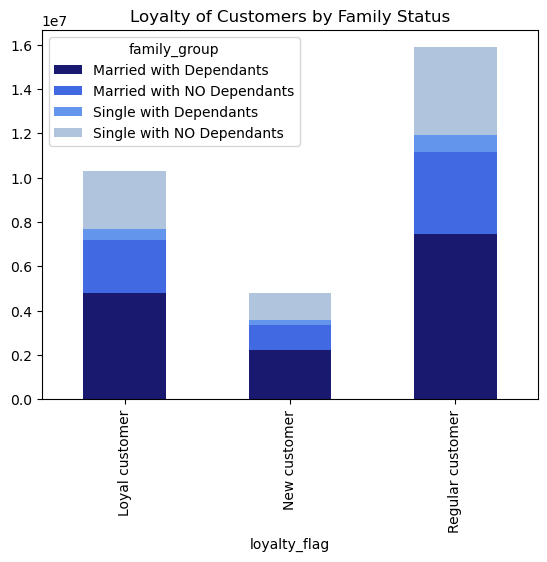

In [87]:
# Create Bar Chart for crosstab_fam_loyal
bar_fam_loyal = crosstab_fam_loyal.plot.bar(title = 'Loyalty of Customers by Family Status', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'], stacked = True)

In [88]:
# Export bar_fam_loyal
bar_fam_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_family_loyalty.png'))

## Step 11 = Customer Profiling for More Relevant Marketing: Loyalty

Explore spending habits by loyalty status

In [25]:
# Check frequency of loyalty_flag with spending_flag
crosstab_loyal_spend = pd.crosstab(df_complete['spending_flag'], df_complete['loyalty_flag'], dropna = False)

In [26]:
# Check Results of crosstab_loyal_spend
crosstab_loyal_spend

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High spender,216600,84011,302814
Low spender,10067493,4719684,15573962


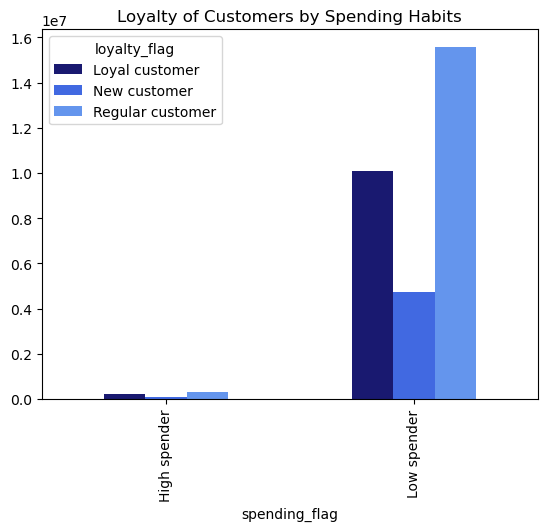

In [28]:
# Create Bar Chart for crosstab_loyal_spend
bar_loyal_spend = crosstab_loyal_spend.plot.bar(title = 'Loyalty of Customers by Spending Habits', color = ['midnightblue', 'royalblue', 'cornflowerblue'])

In [30]:
# Export bar_loyal_spend
bar_loyal_spend.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_loyalty_spending.png'))

Explore ordering hours by loyalty status

In [31]:
# Check frequency of loyalty_flag with order_hour_of_day
crosstab_loyal_ohod = pd.crosstab(df_complete['order_hour_of_day'], df_complete['loyalty_flag'], dropna = False)

In [32]:
# Check Results of crosstab_loyal_ohod
crosstab_loyal_ohod

loyalty_flag,Loyal customer,New customer,Regular customer
order_hour_of_day,,,
0,61748,35311,110983
1,30179,20674,58768
2,17788,12241,35662
3,13374,9510,25912
4,16882,8442,25439
5,29350,12475,42593
6,112865,33901,134247
7,346694,102170,414349
8,643895,208124,807091


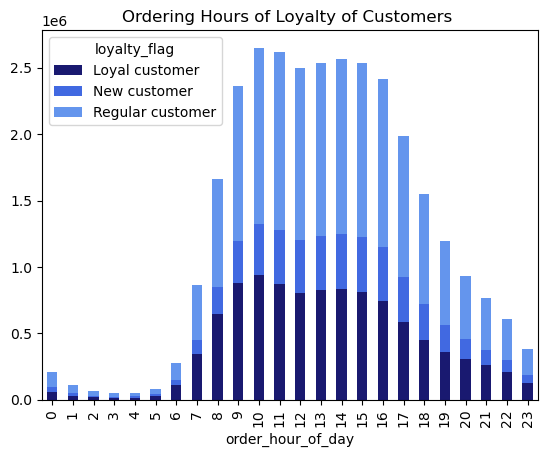

In [34]:
# Create Bar Chart for crosstab_loyal_ohod
bar_loyal_ohod = crosstab_loyal_ohod.plot.bar(title = 'Ordering Hours of Loyalty of Customers ', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [35]:
# Export bar_loyal_ohod
bar_loyal_ohod.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_loyalty_ohod.png'))

Explore ordering days by loyalty status

In [36]:
# Check frequency of loyalty_flag with orders_day_of_week
crosstab_loyal_odow = pd.crosstab(df_complete['orders_day_of_week'], df_complete['loyalty_flag'], dropna = False)

In [37]:
# Check Results of crosstab_loyal_odow
crosstab_loyal_odow

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


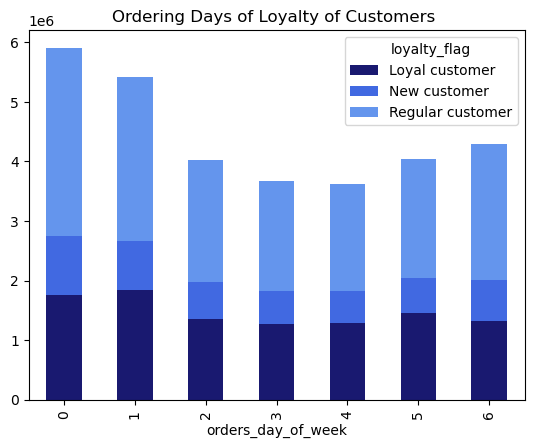

In [38]:
# Create Bar Chart for crosstab_loyal_odow
bar_loyal_odow = crosstab_loyal_odow.plot.bar(title = 'Ordering Days of Loyalty of Customers ', color = ['midnightblue', 'royalblue', 'cornflowerblue'], stacked = True)

In [39]:
# Export bar_loyal_odow
bar_loyal_odow.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_loyalty_odow.png'))

## Step 12 = Customer Profiling for More Relevant Marketing: Region

Explore loyalty flag by region 

In [48]:
# Check frequency of state_region with loyalty_flag
crosstab_region_loyal = pd.crosstab(df_complete['loyalty_flag'], df_complete['state_region'], dropna = False)

In [49]:
# Check Results of crosstab_region_loyal
crosstab_region_loyal

state_region,Midwest,Northeast,South,West
loyalty_flag,,,,
Loyal customer,2373774,1841785,2382249,3686285
New customer,1136761,842156,1128200,1696578
Regular customer,3750978,2780744,3741501,5603553


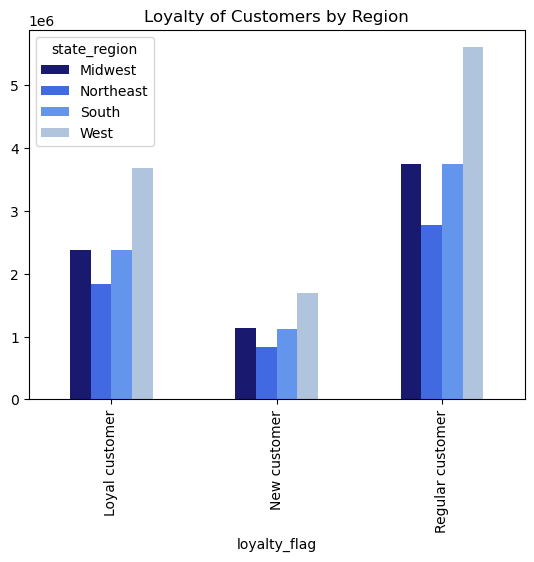

In [50]:
# Create Bar Chart for crosstab_region_loyal
bar_region_loyal = crosstab_region_loyal.plot.bar(title = 'Loyalty of Customers by Region', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [57]:
# Export bar_region_loyal
bar_region_loyal.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_region_loyalty.png'))

Explore departments by region

In [53]:
# Check frequency of state_region with department
crosstab_region_dept = pd.crosstab(df_complete['department'], df_complete['state_region'], dropna = False)

In [54]:
# Check Results of crosstab_region_dept
crosstab_region_dept

state_region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,33867,51700
babies,95741,72712,95756,146183
bakery,261753,199300,260895,398880
beverages,598979,462929,602093,907900
breakfast,156155,117904,156295,240496
bulk,7929,5599,7953,11970
canned goods,237459,176936,236696,360983
dairy eggs,1212490,914616,1206881,1843195
deli,234464,178398,235527,355445


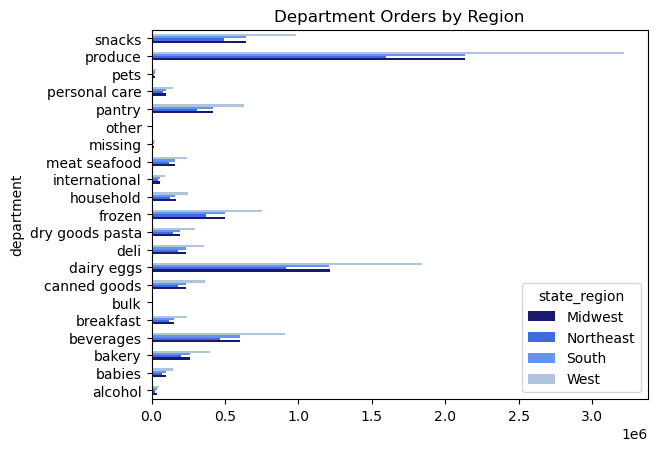

In [56]:
# Create Bar Chart for crosstab_region_dept
bar_region_dept = crosstab_region_dept.plot.barh(title = 'Department Orders by Region', color = ['midnightblue', 'royalblue', 'cornflowerblue', 'lightsteelblue'])

In [58]:
# Export bar_region_dept
bar_region_dept.figure.savefig(os.path.join(path,'04 Analysis','Visualizations','bar_complete_region_department.png'))

## Step 13 = Export Final Data Set

In [211]:
# Export df_complete as Complete_final
df_complete.to_pickle(os.path.join(path,'02 Data','Prepared Data','Complete_Final.pkl'))

In [376]:
# Final shape check
df_complete.shape

(30964564, 38)